In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
com = pd.read_csv(r"C:\Users\Kajal\Downloads\Company_Data.csv")

In [3]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
com.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
com.shape

(400, 11)

In [6]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
com.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [8]:
com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:

threshold = 8

# Create a new column 'Sales_Category' based on the threshold
com['Sales_Category'] = ['High' if x > threshold else 'Low' for x in com['Sales']]


In [10]:
# Encode categorical variables
le = LabelEncoder()
com['ShelveLoc'] = le.fit_transform(com['ShelveLoc'])
com['Urban'] = le.fit_transform(com['Urban'])
com['US'] = le.fit_transform(com['US'])


In [11]:
X = com[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y = com['Sales_Category']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Visualize the decision tree:

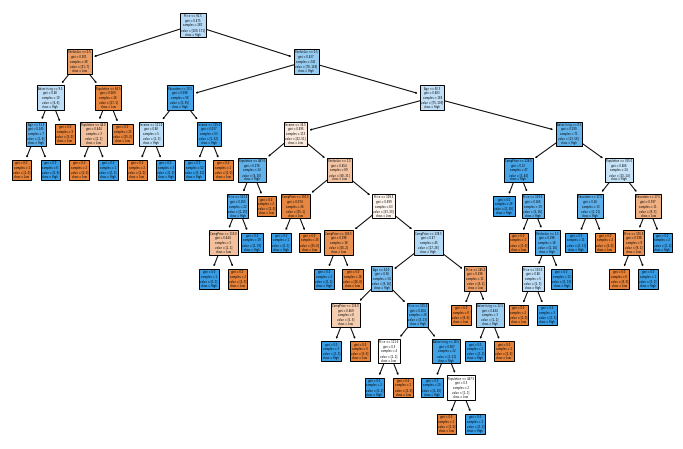

In [14]:

feature_names = list(X.columns)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['Low', 'High'])
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
# Predict on the test data
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6416666666666667

Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.58      0.60        55
         Low       0.66      0.69      0.68        65

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120


Confusion Matrix:
[[32 23]
 [20 45]]


In [17]:
import seaborn as sns 

In [18]:
x_column = 'Income'
y_column = 'Sales'

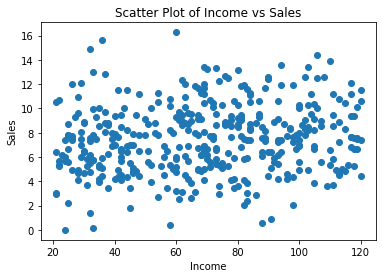

In [19]:

plt.scatter(com[x_column], com[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()

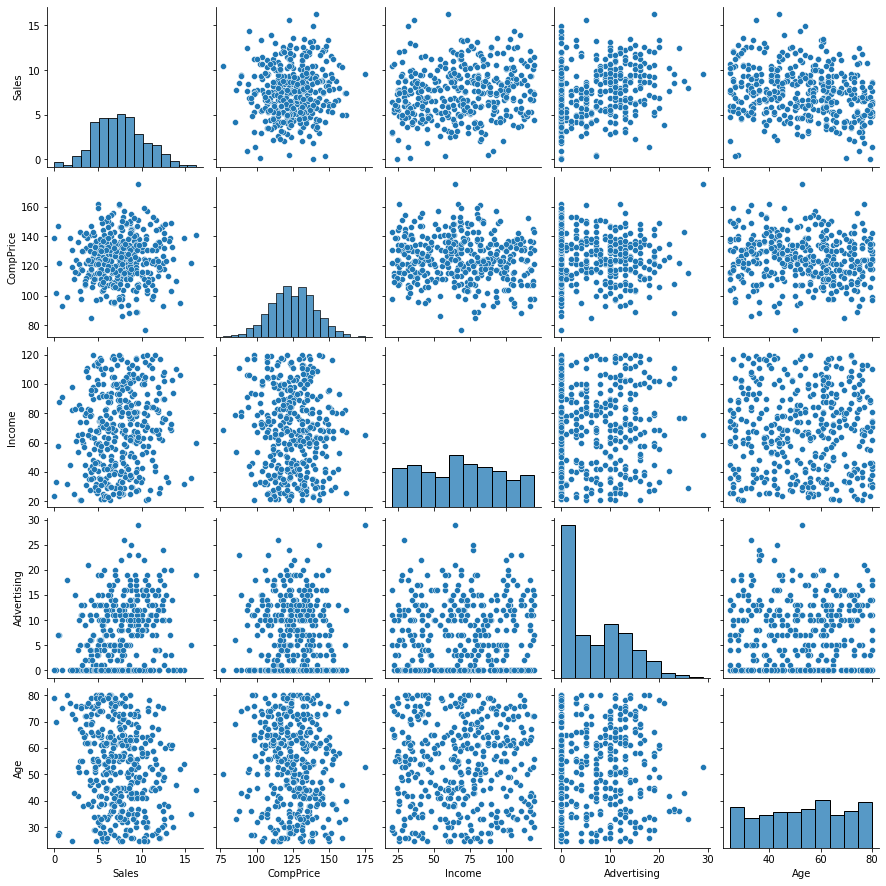

In [20]:
columns_to_plot = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Age']

sns.pairplot(com[columns_to_plot])
plt.show()

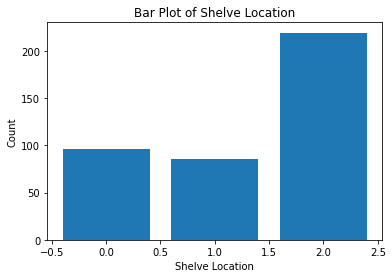

In [23]:
shelve_loc_counts = com['ShelveLoc'].value_counts()
plt.bar(shelve_loc_counts.index, shelve_loc_counts)
plt.xlabel('Shelve Location')
plt.ylabel('Count')
plt.title('Bar Plot of Shelve Location')
plt.show()